# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 601 files belonging to 2 classes.


In [10]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()


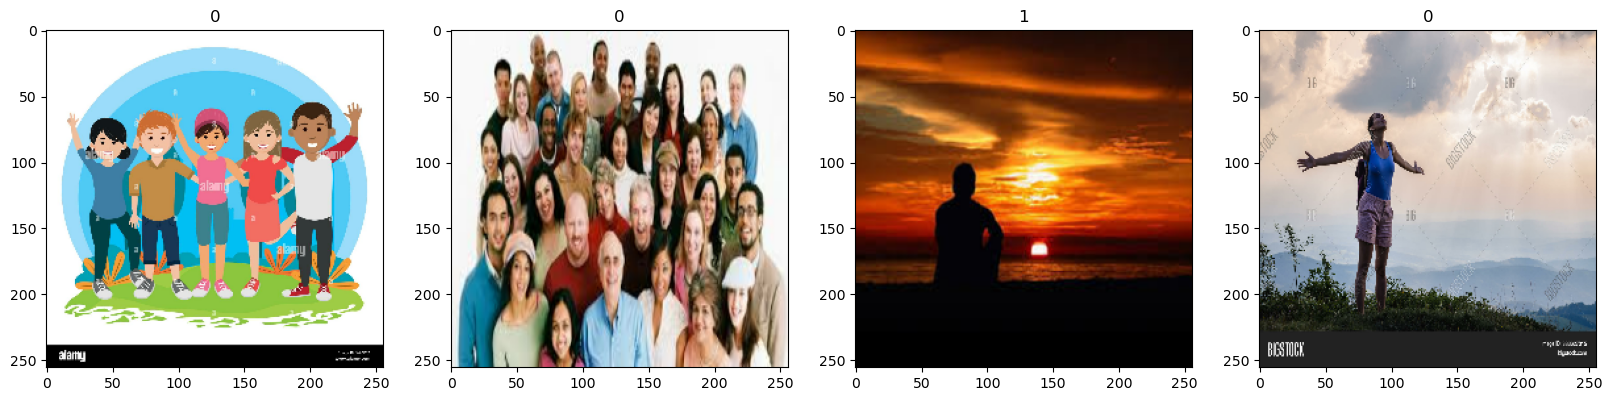

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    '''The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...'''

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
x,y=data.as_numpy_iterator().next()
x.shape

(32, 256, 256, 3)

In [61]:
np.max(x[0])

1.0

In [62]:
np.min(x[0])

0.0018821417

In [17]:
y



array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

13

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
13/13 [==============================] - 8s 152ms/step - loss: 0.8119 - accuracy: 0.5024 - val_loss: 0.7076 - val_accuracy: 0.4479
Epoch 2/20
13/13 [==============================] - 2s 147ms/step - loss: 0.6821 - accuracy: 0.5505 - val_loss: 0.6625 - val_accuracy: 0.6250
Epoch 3/20
13/13 [==============================] - 2s 149ms/step - loss: 0.6495 - accuracy: 0.6274 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 4/20
13/13 [==============================] - 2s 153ms/step - loss: 0.6029 - accuracy: 0.6683 - val_loss: 0.6159 - val_accuracy: 0.6354
Epoch 5/20
13/13 [==============================] - 2s 152ms/step - loss: 0.5931 - accuracy: 0.7139 - val_loss: 0.4688 - val_accuracy: 0.7812
Epoch 6/20
13/13 [==============================] - 2s 154ms/step - loss: 0.5206 - accuracy: 0.7404 - val_loss: 0.4583 - val_accuracy: 0.7812
Epoch 7/20
13/13 [==============================] - 2s 153ms/step - loss: 0.4627 - accuracy: 0.7861 - val_loss: 0.4761 - val_accuracy: 0.7188
Epoch 

# 8. Plot Performance

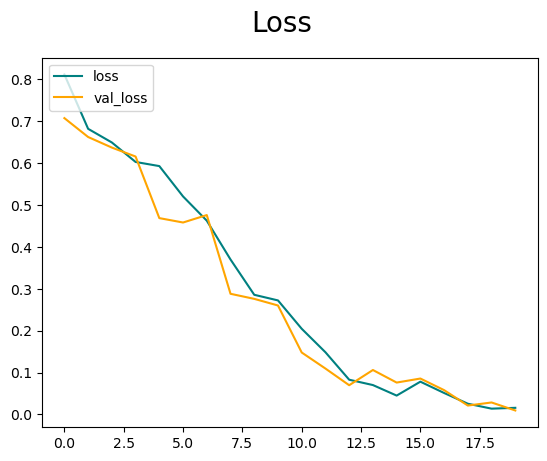

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

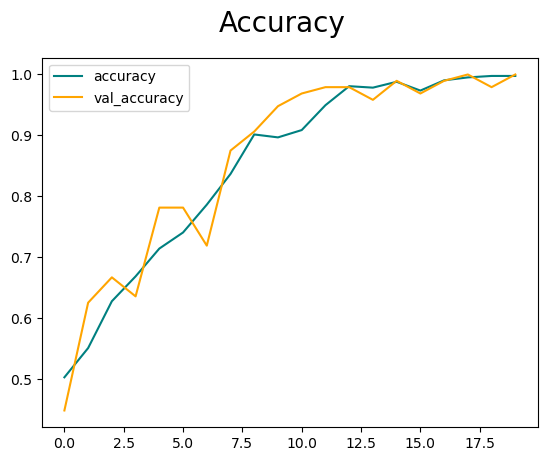

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [63]:
model.evaluate(test)

1/1 [==============================] - 2s 2s/step - loss: 0.0015 - accuracy: 1.0000


[0.0015066151972860098, 1.0]

# 10. Test

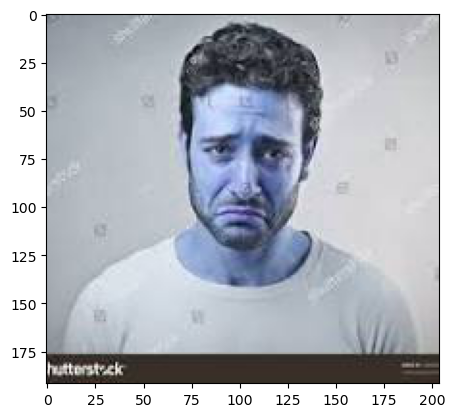

In [37]:
import cv2
img = cv2.imread('sad.jpg')
plt.imshow(img)
plt.show()


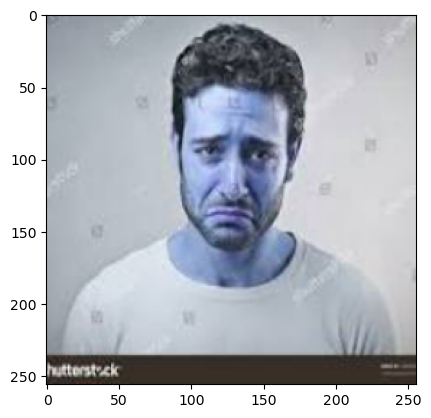

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 380ms/step


In [40]:
yhat

array([[0.99681646]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [47]:
def predict(img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    print(yhat)
    if yhat < 0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')
    

1/1 [==============================] - 0s 20ms/step
[[0.40109777]]
Predicted class is Sad


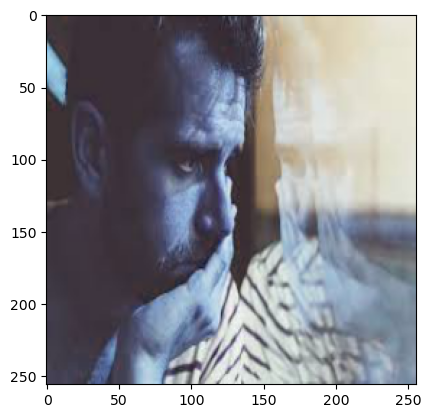

In [48]:
predict('images.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.9976083]]
Predicted class is Happy


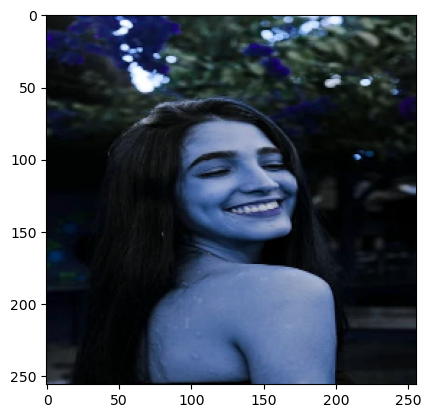

In [49]:
predict('pexels-photo-1999504.webp')

1/1 [==============================] - 0s 22ms/step
[[0.77417886]]
Predicted class is Happy


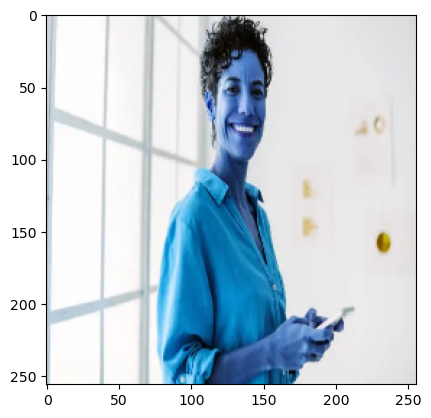

In [50]:
predict('istockphoto-1550744419-612x612.webp')

1/1 [==============================] - 0s 21ms/step
[[0.9975563]]
Predicted class is Happy


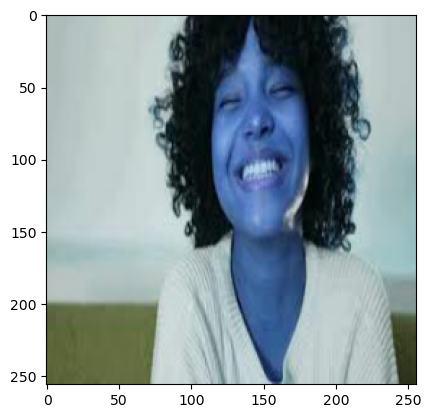

In [51]:
predict('hap.jpg')